In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

In [2]:
import plotly
# import chart_studio.plotly as py
import plotly.graph_objs as go

import pytz
pacific = pytz.timezone('US/Pacific')

plt.close('all')

mapbox_access_token = os.environ['MY_MAPBOX_KEY']

In [3]:
# df_full = pd.read_csv('Data/EXO2 data copied from Kor without headers - 071322 135218.csv', parse_dates=[0,1]) # Smith Creek kayak
df_full = pd.read_csv('Data/EXO2 data copied from Kor without headers - 071622 161323.csv', parse_dates=[0,1]) # Carolina Runner/Banks Channel

df_full.tail(10)

,Date (MM/DD/YYYY),Time (HH:mm:ss),Time (Fract. Sec),Site Name,Cond µS/cm,Depth m,nLF Cond µS/cm,ODO % sat,ODO % CB,ODO mg/L,...,pH,pH mV,Temp °C,Vertical Position m,GPS Latitude °,GPS Longitude °,Altitude m,Battery V,Cable Pwr V,Barometer mmHg
5814,2022-07-16,2022-07-16 15:42:34,0.0,<None>,60382.4,0.188,56247.3,84.6,84.2,5.34,...,8.20,-188.2,28.447,0.223,34.20462,-77.79982,-8.4,5.12,12.1,764.9
5815,2022-07-16,2022-07-16 15:42:35,0.0,<None>,60385.4,0.189,56249.3,84.6,84.2,5.33,...,8.21,-188.2,28.448,0.220,34.20460,-77.79981,-8.4,5.12,12.1,764.9
5816,2022-07-16,2022-07-16 15:42:36,0.0,<None>,60389.2,0.191,56251.5,84.6,84.2,5.33,...,8.21,-188.2,28.449,0.244,34.20458,-77.79980,-8.3,5.12,12.1,764.9
5817,2022-07-16,2022-07-16 15:42:37,0.0,<None>,60392.9,0.192,56253.6,84.6,84.2,5.33,...,8.21,-188.2,28.450,0.231,34.20457,-77.79980,-8.4,5.12,12.1,764.9
5818,2022-07-16,2022-07-16 15:42:38,0.0,<None>,60397.8,0.194,56256.3,84.6,84.2,5.33,...,8.21,-188.3,28.451,0.227,34.20455,-77.79979,-8.2,5.12,12.1,764.9
5819,2022-07-16,2022-07-16 15:42:39,0.0,<None>,60403.7,0.195,56259.1,84.6,84.2,5.33,...,8.21,-188.3,28.454,0.226,34.20454,-77.79978,-8.1,5.12,12.1,764.9
5820,2022-07-16,2022-07-16 15:42:40,0.0,<None>,60410.9,0.197,56262.0,84.6,84.2,5.33,...,8.21,-188.4,28.458,0.230,34.20452,-77.79977,-8.0,5.12,12.1,764.9
5821,2022-07-16,2022-07-16 15:42:41,0.0,<None>,60421.3,0.198,56266.2,84.7,84.3,5.34,...,8.21,-188.4,28.462,0.213,34.20450,-77.79977,-8.3,5.12,12.1,764.9
5822,2022-07-16,2022-07-16 15:42:42,0.0,<None>,60431.4,0.199,56270.0,84.7,84.3,5.34,...,8.21,-188.5,28.468,0.222,34.20449,-77.79976,-8.4,5.12,12.1,765.0
5823,2022-07-16,2022-07-16 15:42:43,0.0,<None>,60447.2,0.200,56274.6,84.8,84.4,5.34,...,8.21,-188.5,28.476,0.224,34.20447,-77.79975,-8.4,5.12,12.1,764.9


In [4]:
df_full.columns

Index(['Date (MM/DD/YYYY)', 'Time (HH:mm:ss)', 'Time (Fract. Sec)',
       'Site Name', 'Cond µS/cm', 'Depth m', 'nLF Cond µS/cm', 'ODO % sat',
       'ODO % CB', 'ODO mg/L', 'Pressure psi a', 'Sal psu', 'SpCond µS/cm',
       'TDS mg/L', 'Turbidity FNU', 'TSS mg/L', 'pH', 'pH mV', 'Temp °C',
       'Vertical Position m', 'GPS Latitude °', 'GPS Longitude °',
       'Altitude m', 'Battery V', 'Cable Pwr V', 'Barometer mmHg'],
      dtype='object')

In [5]:
df_trunc = df_full#[19:335]
df_trunc.head()

,Date (MM/DD/YYYY),Time (HH:mm:ss),Time (Fract. Sec),Site Name,Cond µS/cm,Depth m,nLF Cond µS/cm,ODO % sat,ODO % CB,ODO mg/L,...,pH,pH mV,Temp °C,Vertical Position m,GPS Latitude °,GPS Longitude °,Altitude m,Battery V,Cable Pwr V,Barometer mmHg
0,2022-07-16,2022-07-16 14:05:41,0.0,<None>,60362.5,0.286,56573.5,85.2,84.8,5.39,...,8.4,-197.2,28.143,0.290,34.20412,-77.79978,-14.4,5.11,12.1,765.3
1,2022-07-16,2022-07-16 14:05:42,0.0,<None>,60358.0,0.286,56572.3,85.2,84.8,5.39,...,8.4,-197.2,28.141,0.303,34.20411,-77.79977,-11.3,5.11,12.1,765.2
2,2022-07-16,2022-07-16 14:05:43,0.0,<None>,60353.6,0.287,56571.3,85.1,84.7,5.39,...,8.4,-197.2,28.138,0.286,34.20411,-77.79974,-8.0,5.11,12.1,765.3
3,2022-07-16,2022-07-16 14:05:44,0.0,<None>,60349.2,0.287,56571.1,85.1,84.7,5.38,...,8.4,-197.2,28.135,0.288,34.20412,-77.79974,-10.9,5.11,12.1,765.2
4,2022-07-16,2022-07-16 14:05:45,0.0,<None>,60345.0,0.287,56570.5,85.0,84.6,5.38,...,8.4,-197.2,28.131,0.311,34.20414,-77.79976,-12.7,5.11,12.1,765.4


### Adjust DO, offsetting with assumption of 100% saturation and no gain

In [6]:
# df_trunc['DO'] -= 7.5

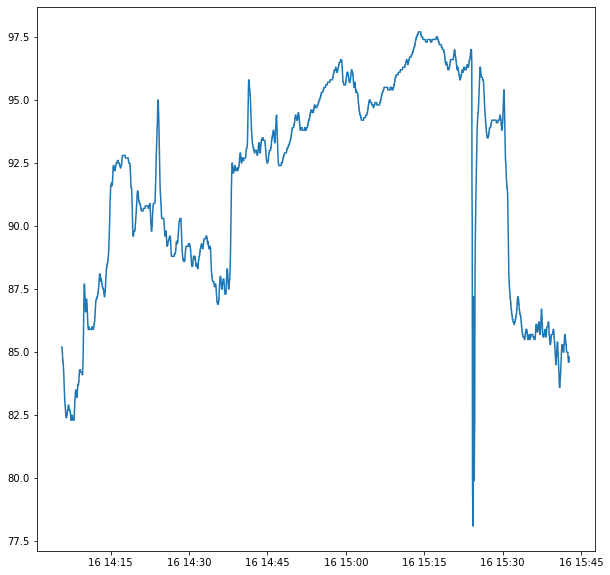

In [13]:
fig, axs = plt.subplots(figsize = (10, 10))
axs.plot(df_trunc['Time (HH:mm:ss)'], df_trunc['ODO % sat'])

In [12]:
#%% Scatterplot with Mapbox/Plotly, setup
lat = df_trunc["GPS Latitude °"]
lon = df_trunc["GPS Longitude °"]
var_name = 'Sal psu'
plot_var = df_trunc[var_name]
plot_var_min  = 36.5#min(plot_var)
plot_var_max  = 38#max(plot_var)

#use the mean lat/lon to center the map
center_map = (lat.mean(), lon.mean())

data = [
   # Smartfin data outlines
   go.Scattermapbox(
       lat=lat,
       lon=lon,
       mode='markers',
       showlegend = False,
       marker=dict(
           size=20,
           color='black',
           opacity=0.8
       ),
       hoverinfo='none'
   ),

   # Smartfin data
   go.Scattermapbox(
       lat=lat,
       lon=lon,
       mode='markers',
       showlegend = True,
       marker=dict(
           size=17,
           color=plot_var,
           colorscale = 'Viridis',
           cmin = plot_var_min,
           cmax = plot_var_max,
           showscale = True,
           opacity=0.6
       ),
       text=plot_var,
       hoverinfo='text'
   ),

]

layout = go.Layout(
   title=var_name,
   autosize=True,
   hovermode='closest',
   showlegend = False,
   mapbox=dict(
       accesstoken=mapbox_access_token,
       bearing=0,
       center=dict(
           lat=center_map[0],
           lon=center_map[1]
       ),
       pitch=0,
       zoom=9,
       style='satellite'
   ),
   margin = go.Margin(
       l = 0,
       r = 20,
       b = 20,
       t = 30,
       pad=4
   )
)

fig = dict(data=data, layout=layout)
figname = 'interact_'+str(datetime.datetime.now().date())
htmlname = figname+'.html'
plot_url = plotly.offline.plot(fig, filename=htmlname)

### 

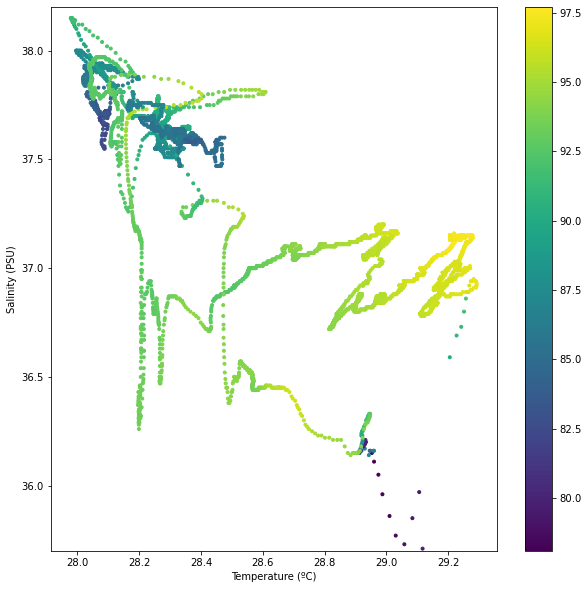

In [23]:
fig, axs = plt.subplots(figsize = (10, 10))
cax = axs.scatter(df_trunc['Temp °C'], df_trunc['Sal psu'], marker = '.', c = df_trunc['ODO % sat'])
axs.set_ylim([35.7, 38.2])
axs.set_xlabel("Temperature (ºC)")
axs.set_ylabel("Salinity (PSU)")
cbar = fig.colorbar(cax)